## Importing libraries adn exploring the data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sns.set(style="whitegrid")

In [26]:
df = pd.read_csv('../data/processed/flights cleaned.csv')
df

,Airline,Departure City,Departure Time,Number of Stops,Arrival Time,Arrival City,Flight Class,Flight Duration (hours),Days Until Departure,Price (USD)
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,71.436
1,SpiceJet,Delhi,Early Morning,0,Morning,Mumbai,Economy,2.33,1,71.436
2,AirAsia,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.17,1,71.472
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,71.460
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,71.460
...,...,...,...,...,...,...,...,...,...,...
297935,Vistara,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,831.180
297936,Vistara,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,925.260
297937,Vistara,Chennai,Early Morning,1,Night,Hyderabad,Business,13.83,49,949.188
297938,Vistara,Chennai,Early Morning,1,Evening,Hyderabad,Business,10.00,49,979.020


## 1. Univariate Analysis (Single Feature)

### 1.1 Categorical Features

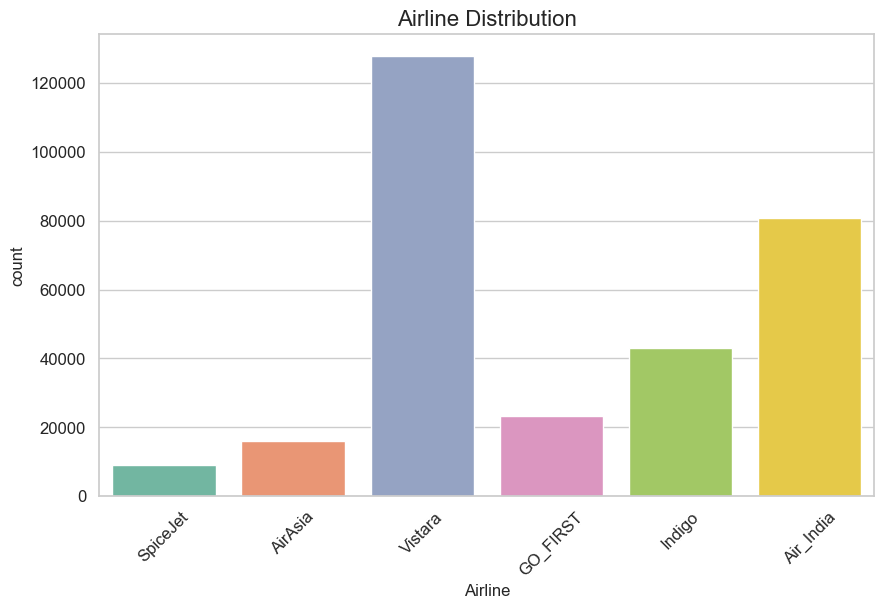

In [20]:
plt.figure(figsize=(10, 6))
airline_palette = sns.color_palette("Set2")
sns.countplot(x='Airline', data=df, palette=airline_palette)
plt.title('Airline Distribution', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

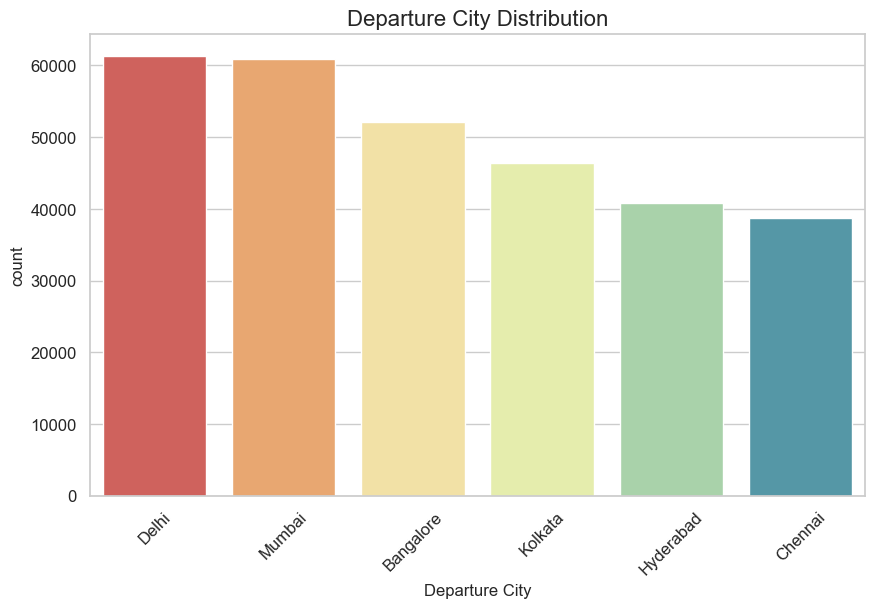

In [21]:
plt.figure(figsize=(10, 6))
city_palette = sns.color_palette("Spectral")
sns.countplot(x='Departure City', data=df, palette=city_palette)
plt.title('Departure City Distribution', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 1.2 Numerical Features

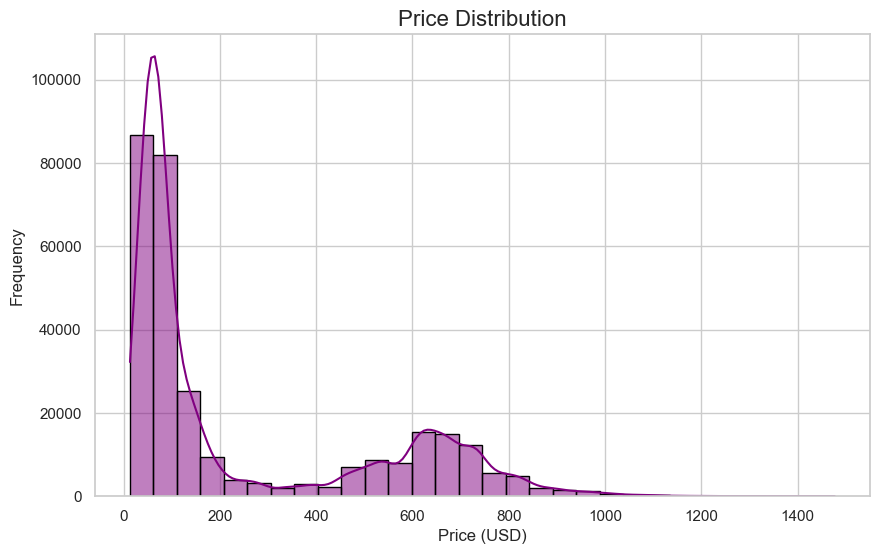

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (USD)'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

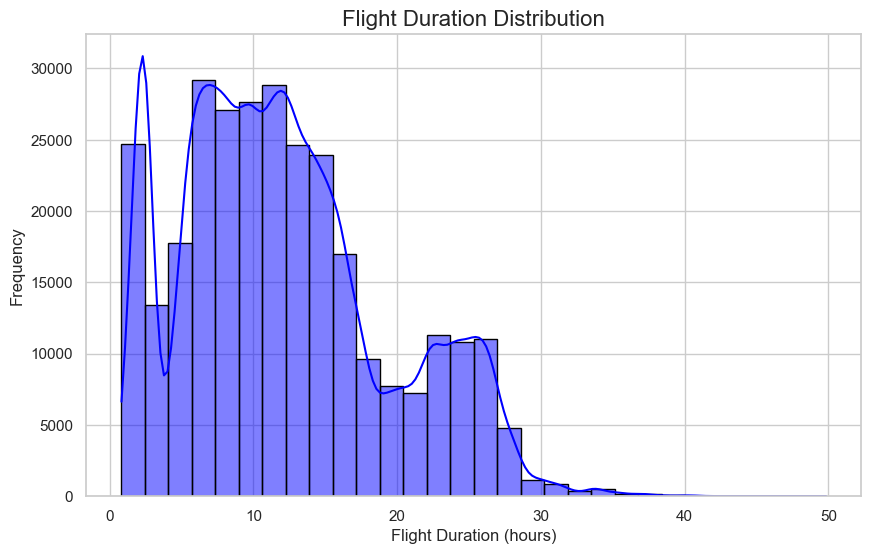

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Flight Duration (hours)'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Flight Duration Distribution', fontsize=16)
plt.xlabel('Flight Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## 2. Bivariate Analysis (Two Features)

### 2.1 Numerical vs Numerical

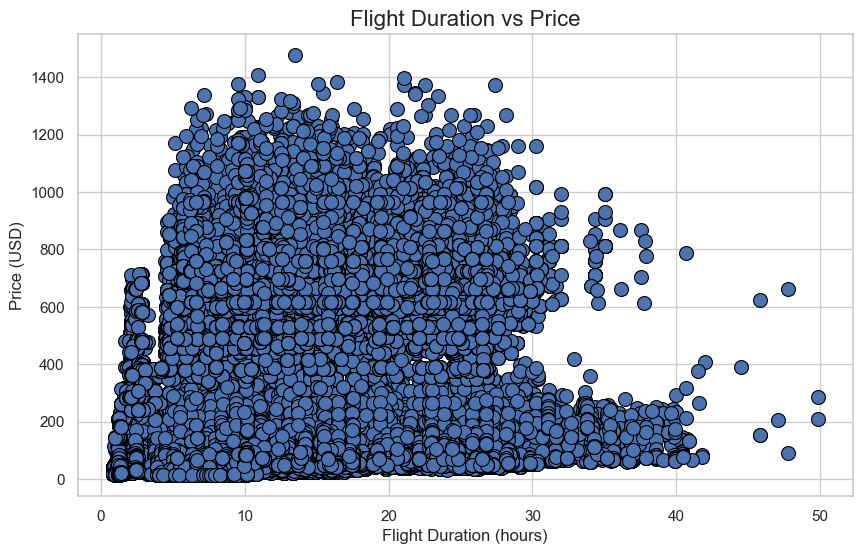

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Duration (hours)', y='Price (USD)', data=df, 
                marker='o', edgecolor='black', s=100)
plt.title('Flight Duration vs Price', fontsize=16)
plt.xlabel('Flight Duration (hours)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

### 2.2 Categorical vs Numerical

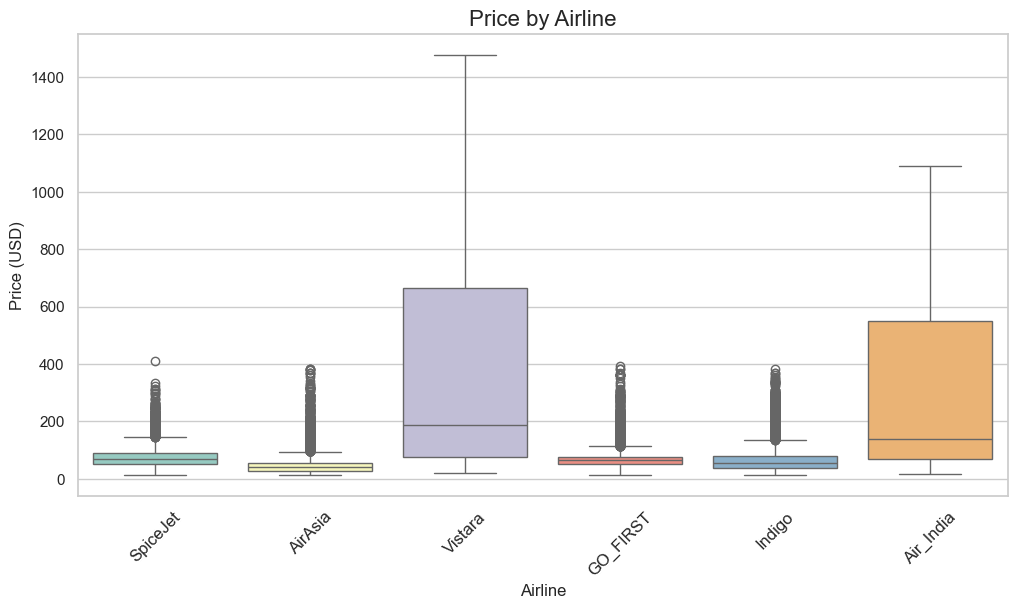

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price (USD)', data=df, palette='Set3')
plt.title('Price by Airline', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

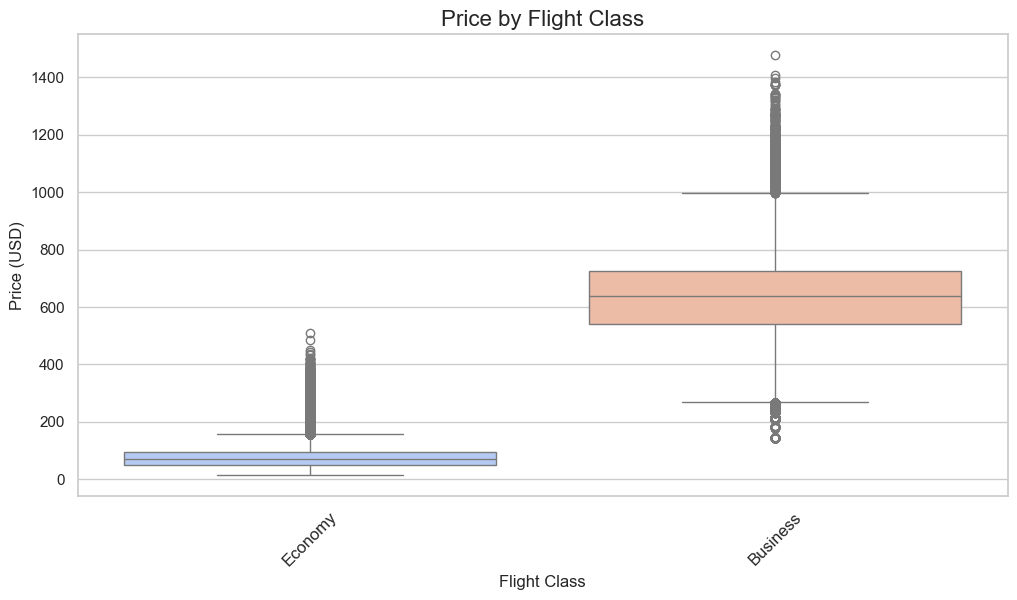

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Flight Class', y='Price (USD)', data=df, palette='coolwarm')
plt.title('Price by Flight Class', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### 2.3 Categorical vs Categorical

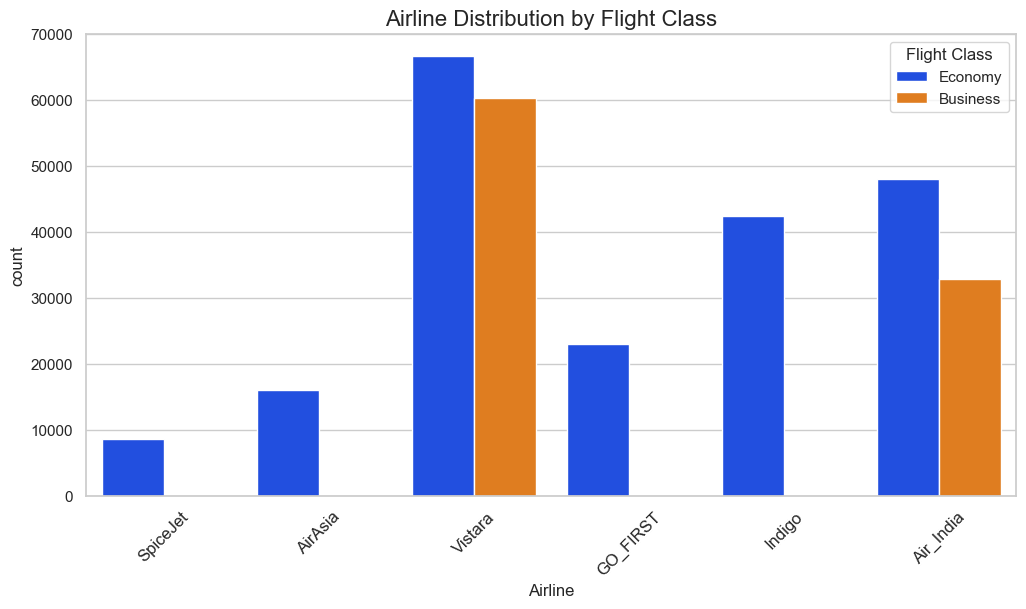

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', hue='Flight Class', data=df, palette='bright')
plt.title('Airline Distribution by Flight Class', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

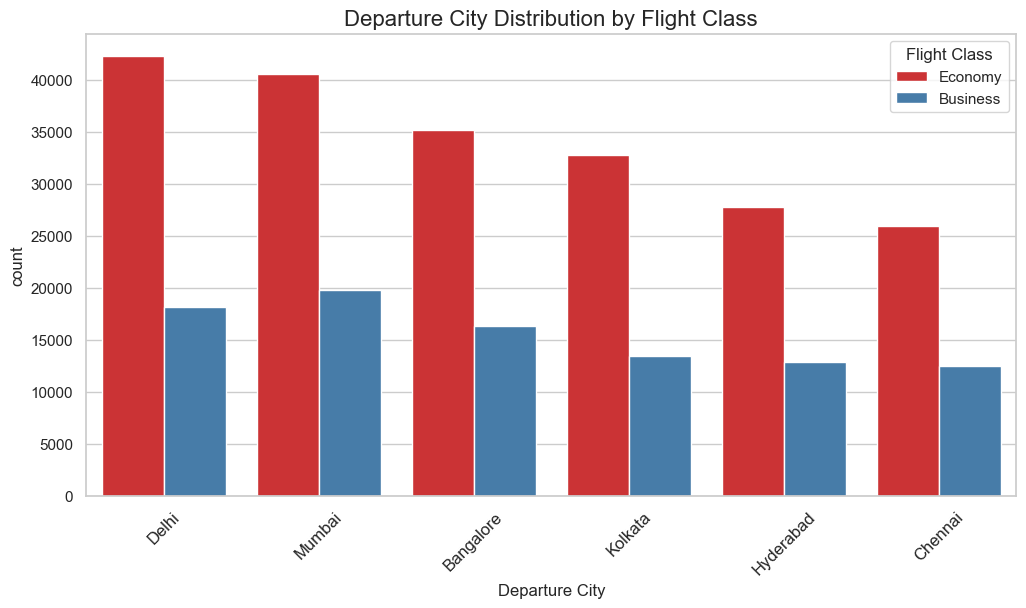

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Departure City', hue='Flight Class', data=df, palette='Set1')
plt.title('Departure City Distribution by Flight Class', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

## 3. Multivariate Analysis (Multiple Features)

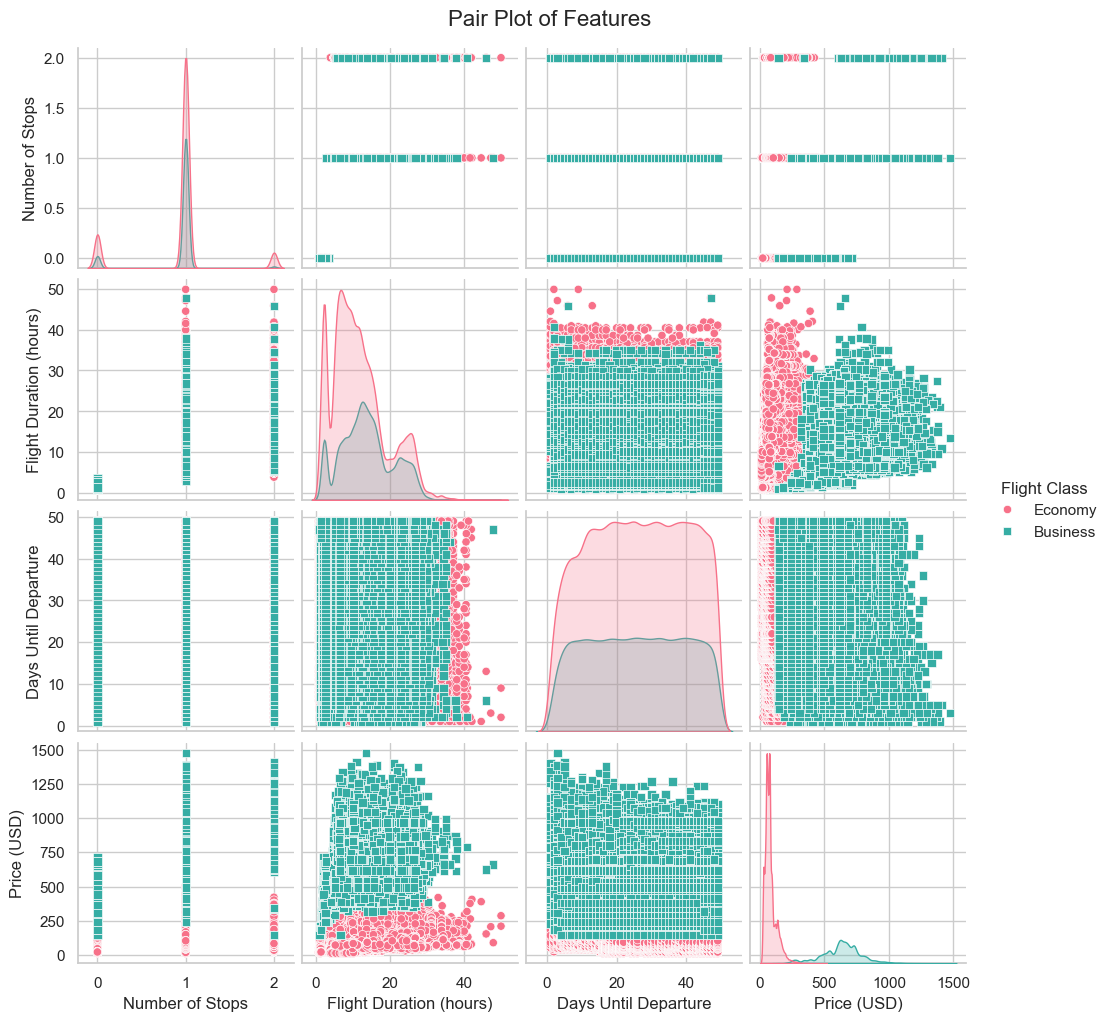

In [34]:
sns.pairplot(df, hue='Flight Class', palette='husl', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', y=1.02, fontsize=16)
plt.show()

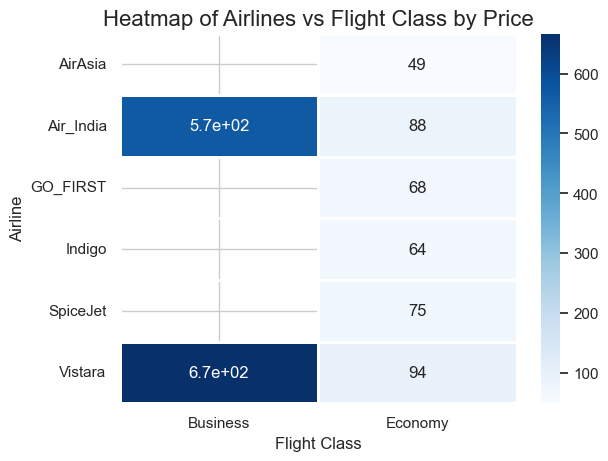

In [35]:
pivot_table = pd.pivot_table(df, values='Price (USD)', index='Airline', columns='Flight Class', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='Blues', linewidths=1)
plt.title('Heatmap of Airlines vs Flight Class by Price', fontsize=16)
plt.show()

## 4. Time-Based Analysis

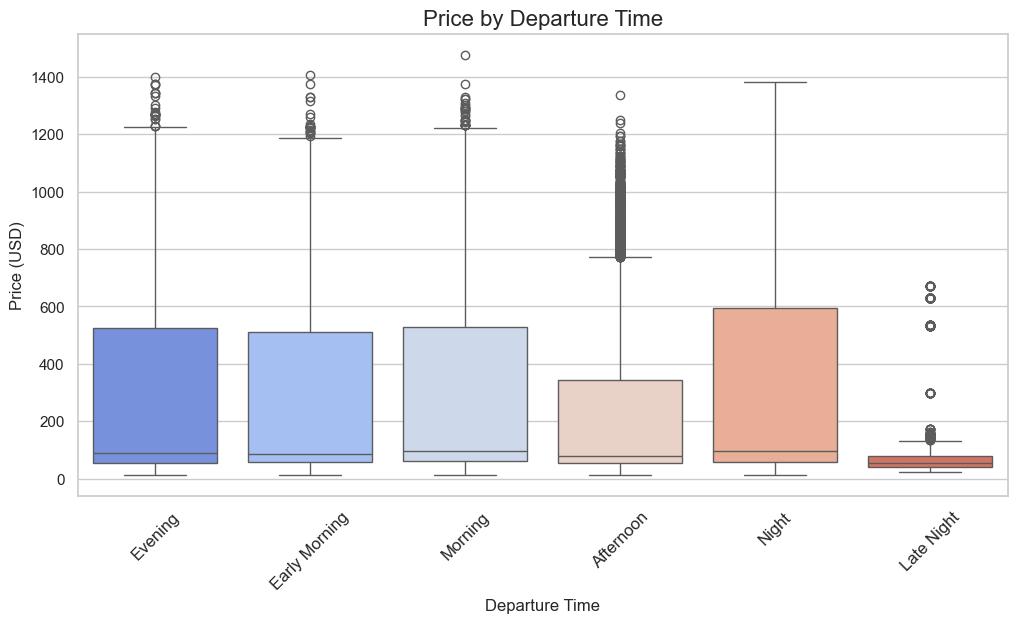

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Departure Time', y='Price (USD)', data=df, palette='coolwarm')
plt.title('Price by Departure Time', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

## 5. Flight Duration and Stops Analysis

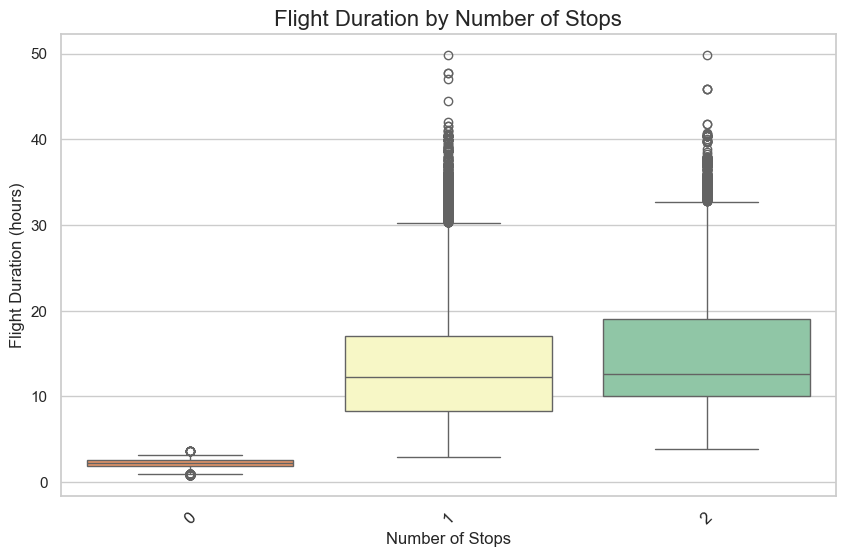

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of Stops', y='Flight Duration (hours)', data=df, palette='Spectral')
plt.title('Flight Duration by Number of Stops', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

## 6. Joint Plots (KDE and Scatter)

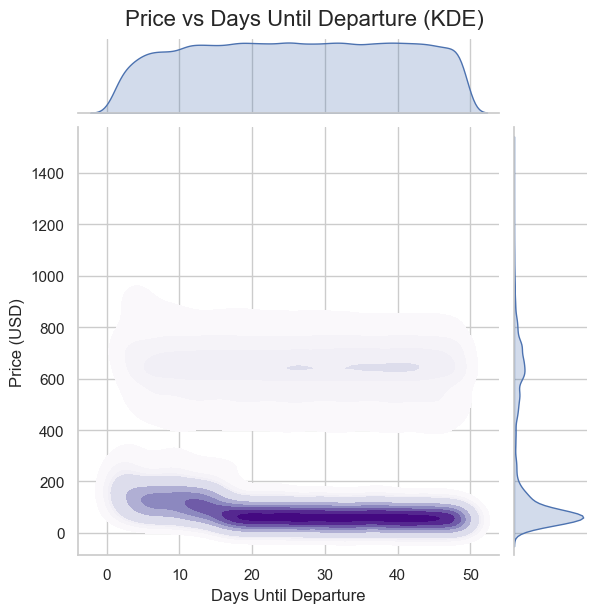

In [38]:
sns.jointplot(x='Days Until Departure', y='Price (USD)', data=df, kind='kde', fill=True, cmap='Purples')
plt.suptitle('Price vs Days Until Departure (KDE)', y=1.02, fontsize=16)
plt.show()

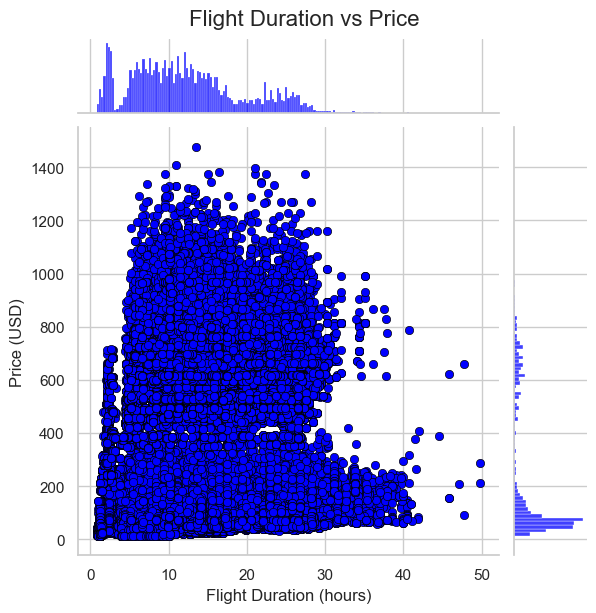

In [40]:
sns.jointplot(x='Flight Duration (hours)', y='Price (USD)', data=df, kind='scatter', color='blue', edgecolor='black')
plt.suptitle('Flight Duration vs Price', y=1.02, fontsize=16)
plt.show()

## 7. Facet Grid

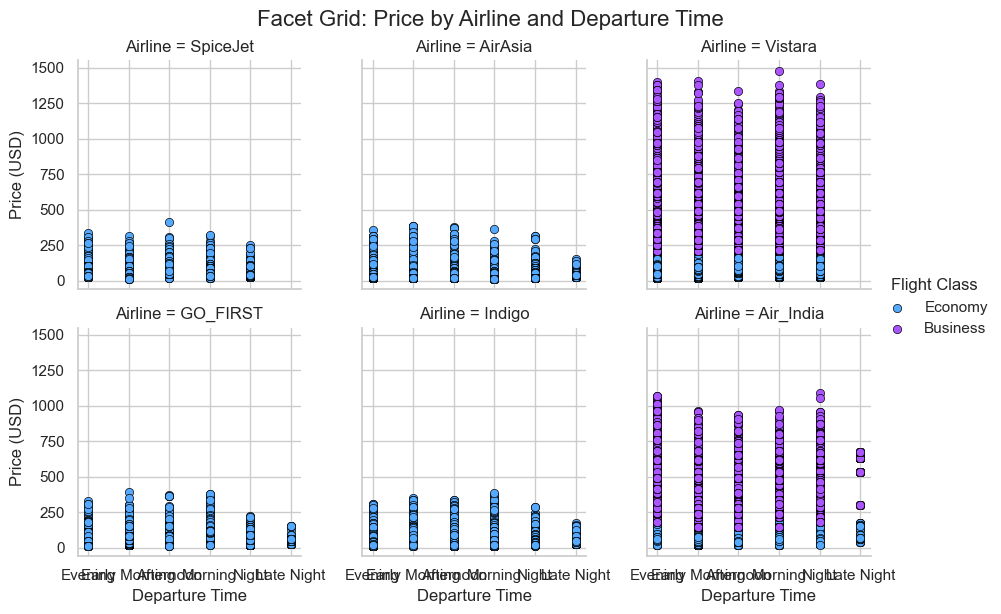

In [39]:
g = sns.FacetGrid(df, col="Airline", hue="Flight Class", col_wrap=3, palette='cool')
g.map(sns.scatterplot, "Departure Time", "Price (USD)", edgecolor='black')
g.add_legend()
g.fig.suptitle('Facet Grid: Price by Airline and Departure Time', y=1.02, fontsize=16)
plt.show()